In [ ]:
pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

def load_dataset(benchmark, algo):
  real_data_orig=pd.read_csv(drive_location+algo+".csv")
  #print(real_data_orig)
  #real_data_selected_col = real_data_orig.drop(columns=['sys','sysname','arch','PS','executable'])
  if (benchmark == "SPEC2006" or benchmark == "SPEC2017"):
    real_data_selected_col=real_data_orig.drop(columns=['arch','ld_shared_by_cores','l2_shared_by_cores','no_of_threads','system_name','bus_speed_qpi','bus_speed_dmi','l1_ins_assoc','l1_data_assoc','l2_assoc','l3_assoc','raw_bus_speed','converted_bus_speed','ddr_type','runtime'])
  elif (benchmark == "NPB"):
    real_data_selected_col=real_data_orig.drop(columns=['sys','sysname','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','PS','runtime','executable','system'])
  else:
    real_data_selected_col=real_data_orig.drop(columns=['sys','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','runtime'])
  #print(real_data_selected_col)
  real_data_selected_col.dropna(inplace=True)
  #print(real_data_selected_col)
  return real_data_selected_col

In [ ]:
drive_location = r"/content/drive/My Drive/SITesting/"

# Mantevo Suite
#benchmark = "Mantevo"
#algo="mantevo_miniFE"
#algo_fname="runtimes_final_mantevo_miniFE"
# NPB Suite
#benchmark = "NPB"
#algo = "npb_ep"
#algo_fname="runtimes_final_npb_ep"
#benchmark = "NPB"
#algo = "npb_mg"
#algo_fname="runtimes_final_npb_mg"
# SPEC 2006 Float
#benchmark = "SPEC2006"
#algo = "leslie3d"
#algo_fname = "437.leslie3d"
# SPEC 2006 Int
#benchmark = "SPEC2006"
#algo = "perlbench"
#algo_fname = "400.perlbench"
benchmark = "SPEC2017"
algo = "603.bwaves_s"
algo_fname = "603.bwaves_s"

spec_float_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_float_algo_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]
spec_float_algo_fname_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]

spec_int_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_int_algo_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]
spec_int_algo_fname_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]

npb_other_benchmark_list = ["NPB","NPB","NPB","NPB","OTHER","OTHER","OTHER"]
npb_other_algo_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]
npb_other_algo_fname_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]


# Assign variable with which list is to be processed
benchmark_list = npb_other_benchmark_list
algo_list = npb_other_algo_list
algo_fname_list = npb_other_algo_fname_list
#for algo_idx, algo in enumerate(algo_list):

pd.set_option("display.max_columns", None)
# Load and preprocess real dataset
real_data = load_dataset(benchmark, algo)
real_data.to_csv(drive_location+algo+"_real_data_tf.csv",index=False)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

real_data.head()
real_data['isa']=le.fit_transform(real_data['isa'])
real_data['mem_type']=le.fit_transform(real_data['mem_type'])
real_data.head()

,cpu_clock,isa,l1_size,l2_size,l3_size,num-cpus,mem_type,mem_clock,mem_size
0,2.7,0,32,1024,49152,36,2,2666,768
1,2.1,0,32,1024,77824,56,2,2666,768
2,2.5,0,32,1024,77824,56,2,2666,384
3,3.0,0,32,1024,49152,36,2,2666,384
4,2.7,0,32,1024,49152,36,2,2666,384


In [ ]:
from ctgan import CTGANSynthesizer

columns=list(real_data.columns)

ctgan=CTGANSynthesizer(epochs=5000)
ctgan.fit(real_data,columns)

In [ ]:
sample=ctgan.sample(1000)
# sample.to_csv(drive_location+algo+'Generated_sample_ctgan.csv')

In [ ]:
print(sample)

     cpu_clock  isa  l1_size  l2_size  l3_size  num-cpus  mem_type  mem_clock  \
0          3.2    0       32      512    49152        24         2       2666   
1          3.2    0       32     1024    49152        24         2       2666   
2          3.5    0       32      256    22528        24         2       2666   
3          3.6    0       32     1024    22528        16         2       2666   
4          2.1    0       32     1024    24576        16         2       2666   
..         ...  ...      ...      ...      ...       ...       ...        ...   
995        3.6    0       32     1024     8192       168         2       2666   
996        2.4    0       32     1024    55296        40         4       2933   
997        1.9    0       32     1024    22528        16         4       2933   
998        3.2    0       32      512   131072         8         5       3200   
999        3.7    0       32      256    16384         8         2       2666   

     mem_size  
0         7

In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


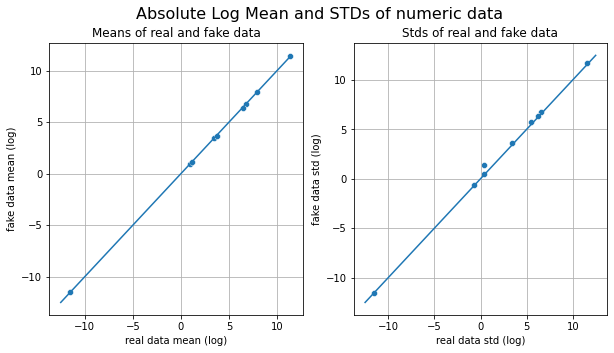

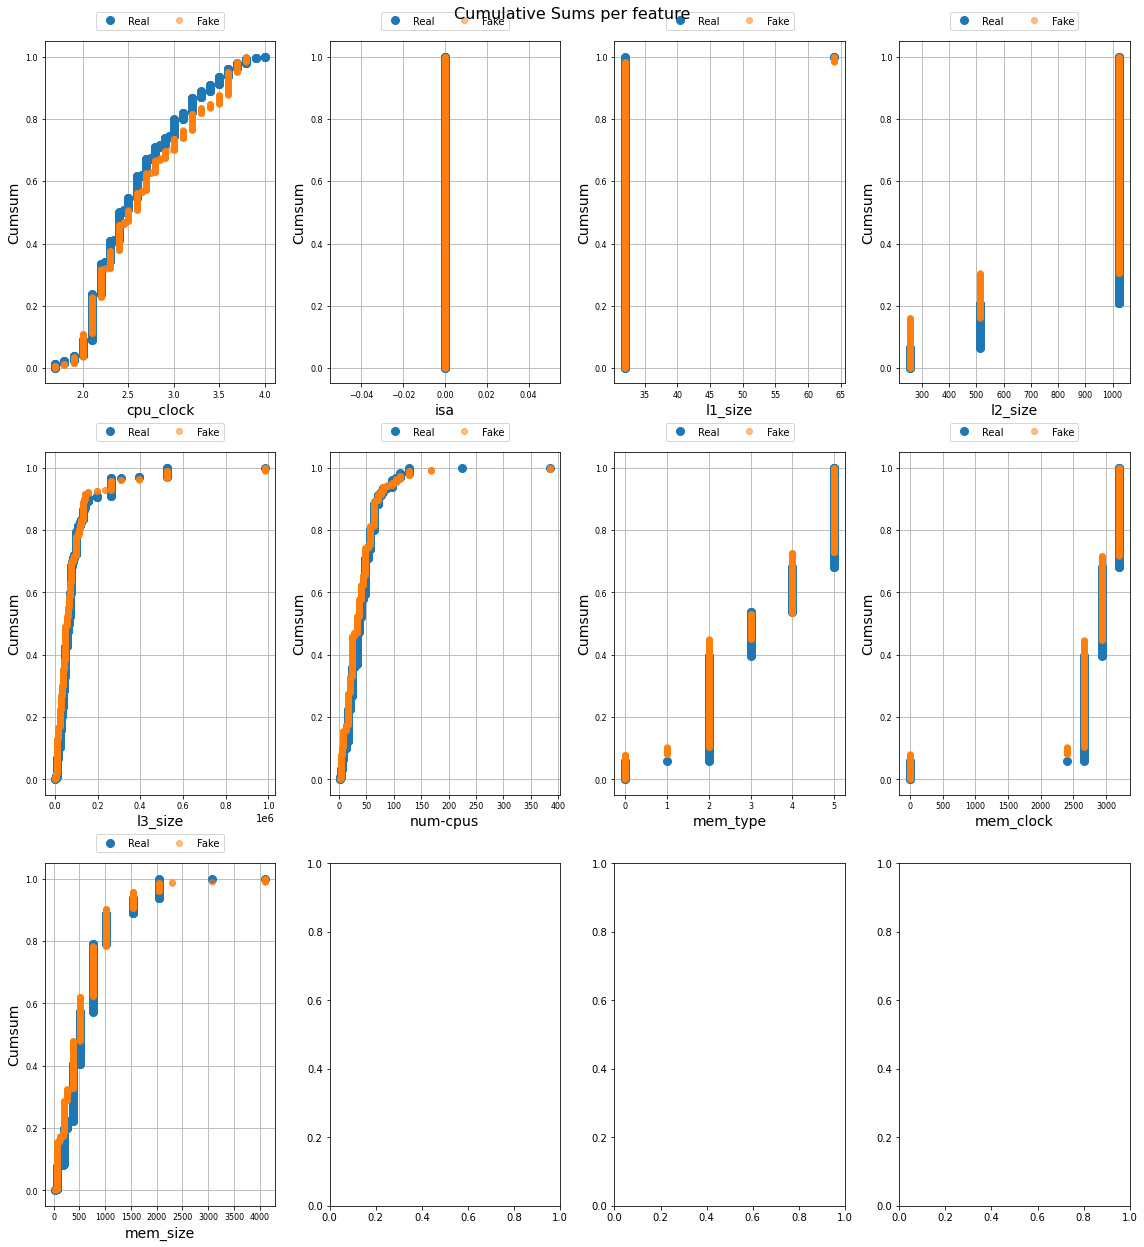

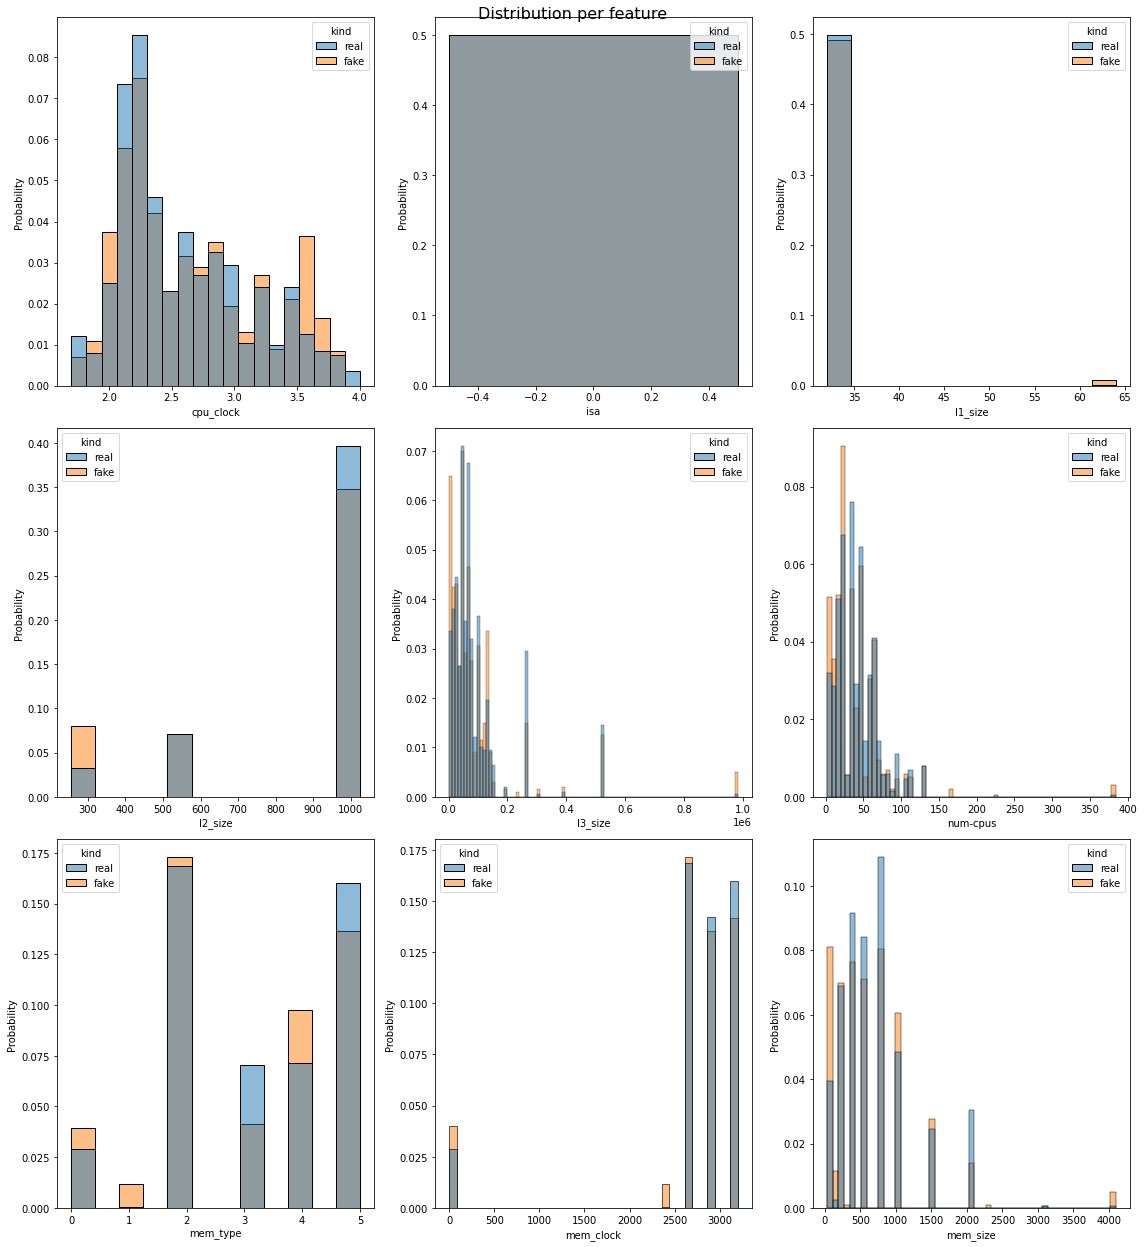

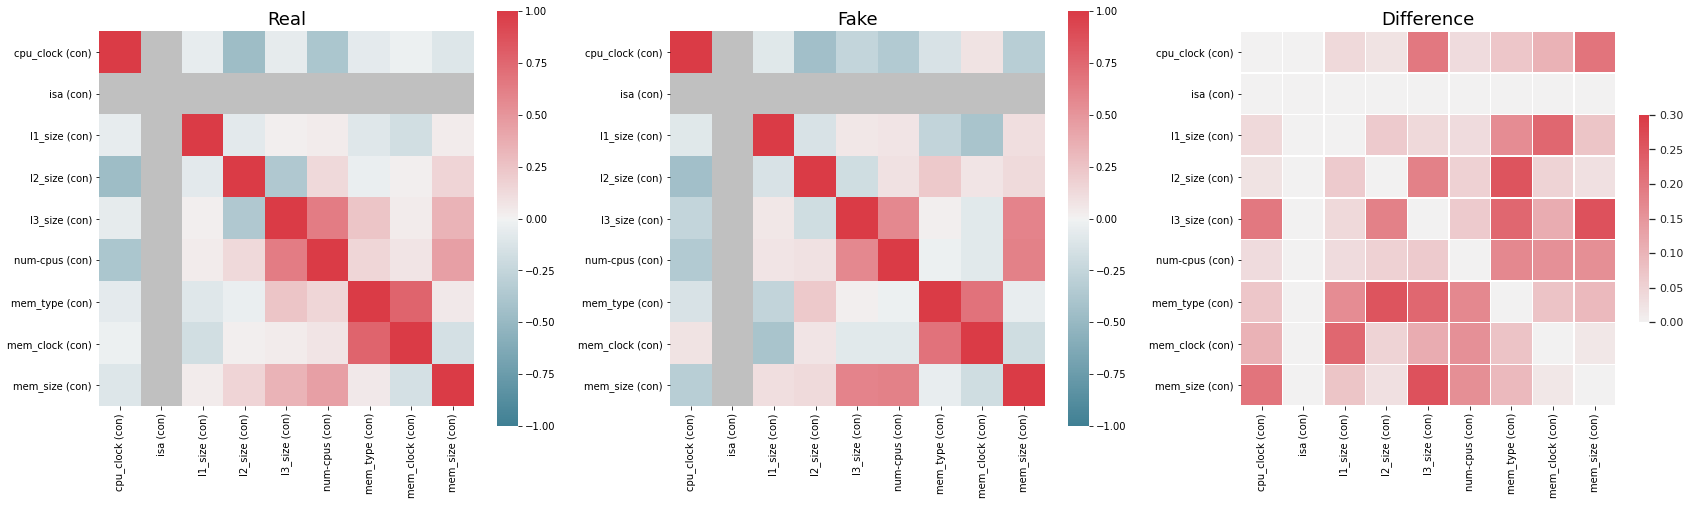

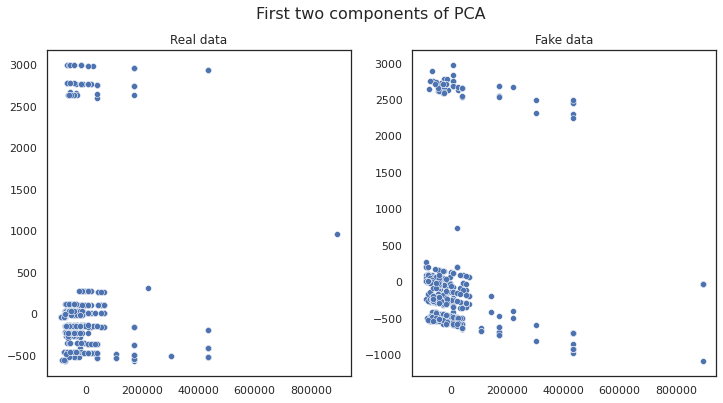

In [ ]:
from table_evaluator import load_data, TableEvaluator

table_evaluator =  TableEvaluator(real_data, sample)
table_evaluator.visual_evaluation()

In [ ]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 4.6 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 98 kB 8.6 MB/s 
     |████████████████████████████████| 1.2 MB 53.5 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 11.2 MB 37.0 MB/s 
     |████████████████████████████████| 930 kB 27.2 MB/s 
     |████████████████████████████████| 2.5 MB 39.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [ ]:
from sdv.evaluation import evaluate

evaluate(sample,real_data,metrics=['CSTest', 'LogisticDetection','KSTest'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9242632097788763

In [ ]:
ctgan.save(drive_location+'model/ctgan')

In [ ]:
import pickle

In [ ]:
# save model
with open(drive_location+'model/ctgan_model_pkl','wb') as files:
  pickle.dump(ctgan,files)

In [ ]:
#load saved model
with open(drive_location+'model/ctgan_model_pkl','rb') as f:
  load_model=pickle.load(f)

In [ ]:
new_sample=load_model.sample(500)

1986 500
Index(['cpu_clock', 'isa', 'l1_size', 'l2_size', 'l3_size', 'num-cpus',
       'mem_type', 'mem_clock', 'mem_size'],
      dtype='object') Index(['cpu_clock', 'isa', 'l1_size', 'l2_size', 'l3_size', 'num-cpus',
       'mem_type', 'mem_clock', 'mem_size'],
      dtype='object')


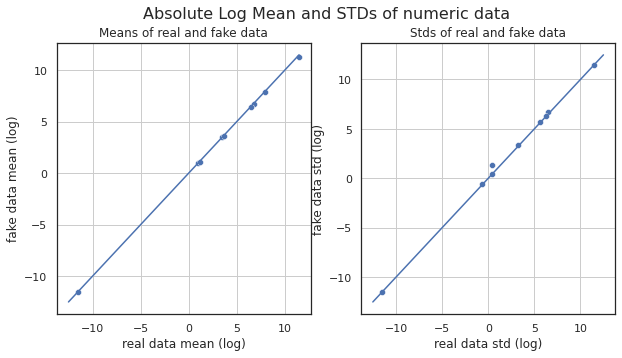

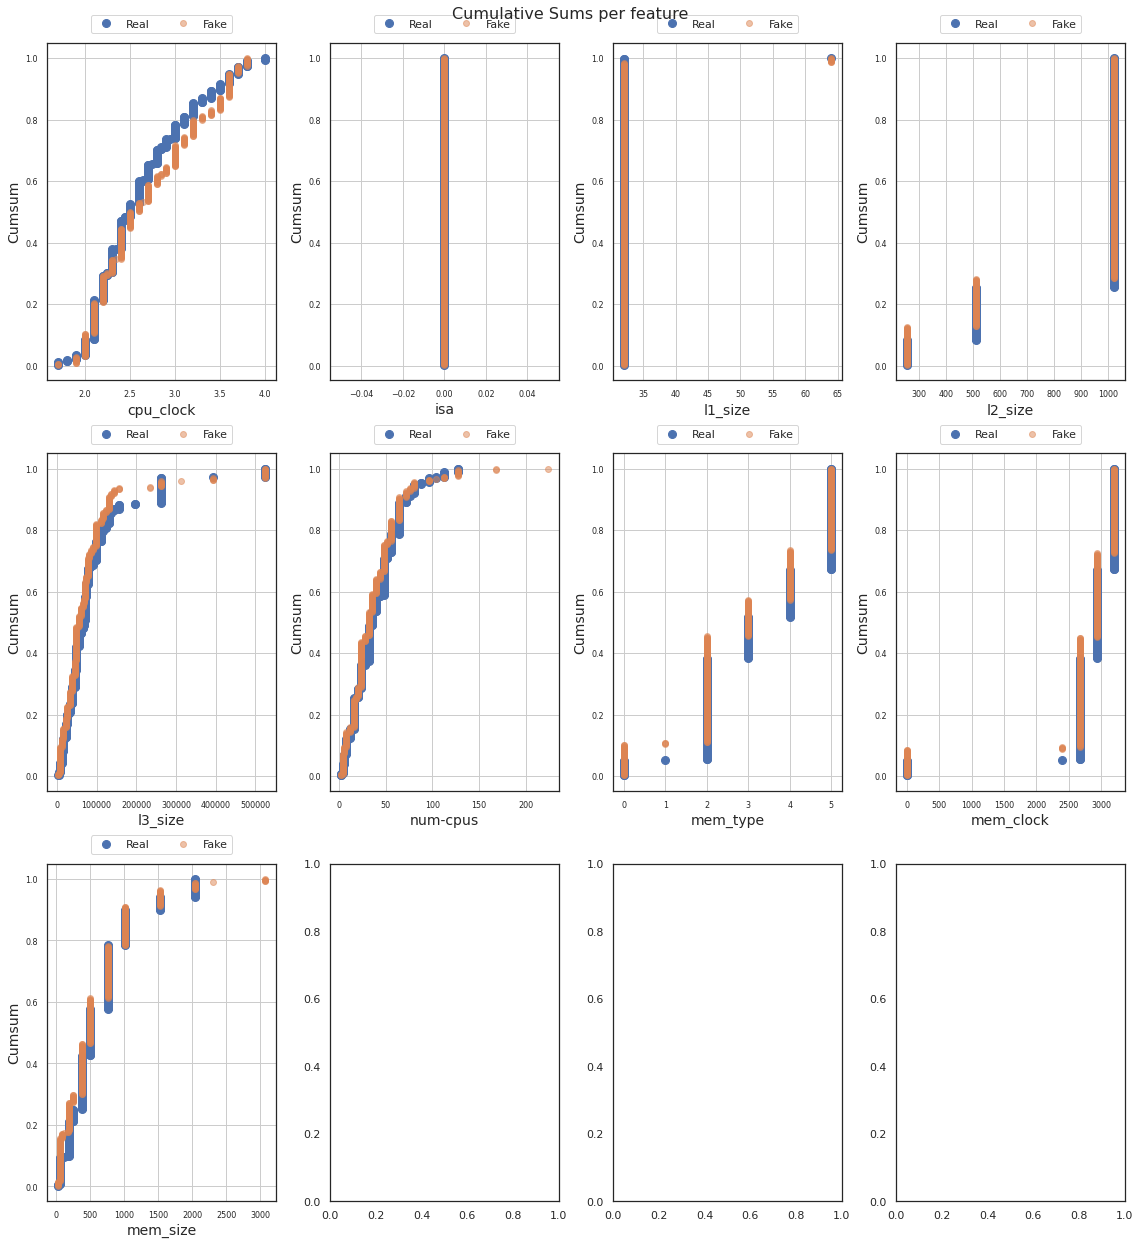

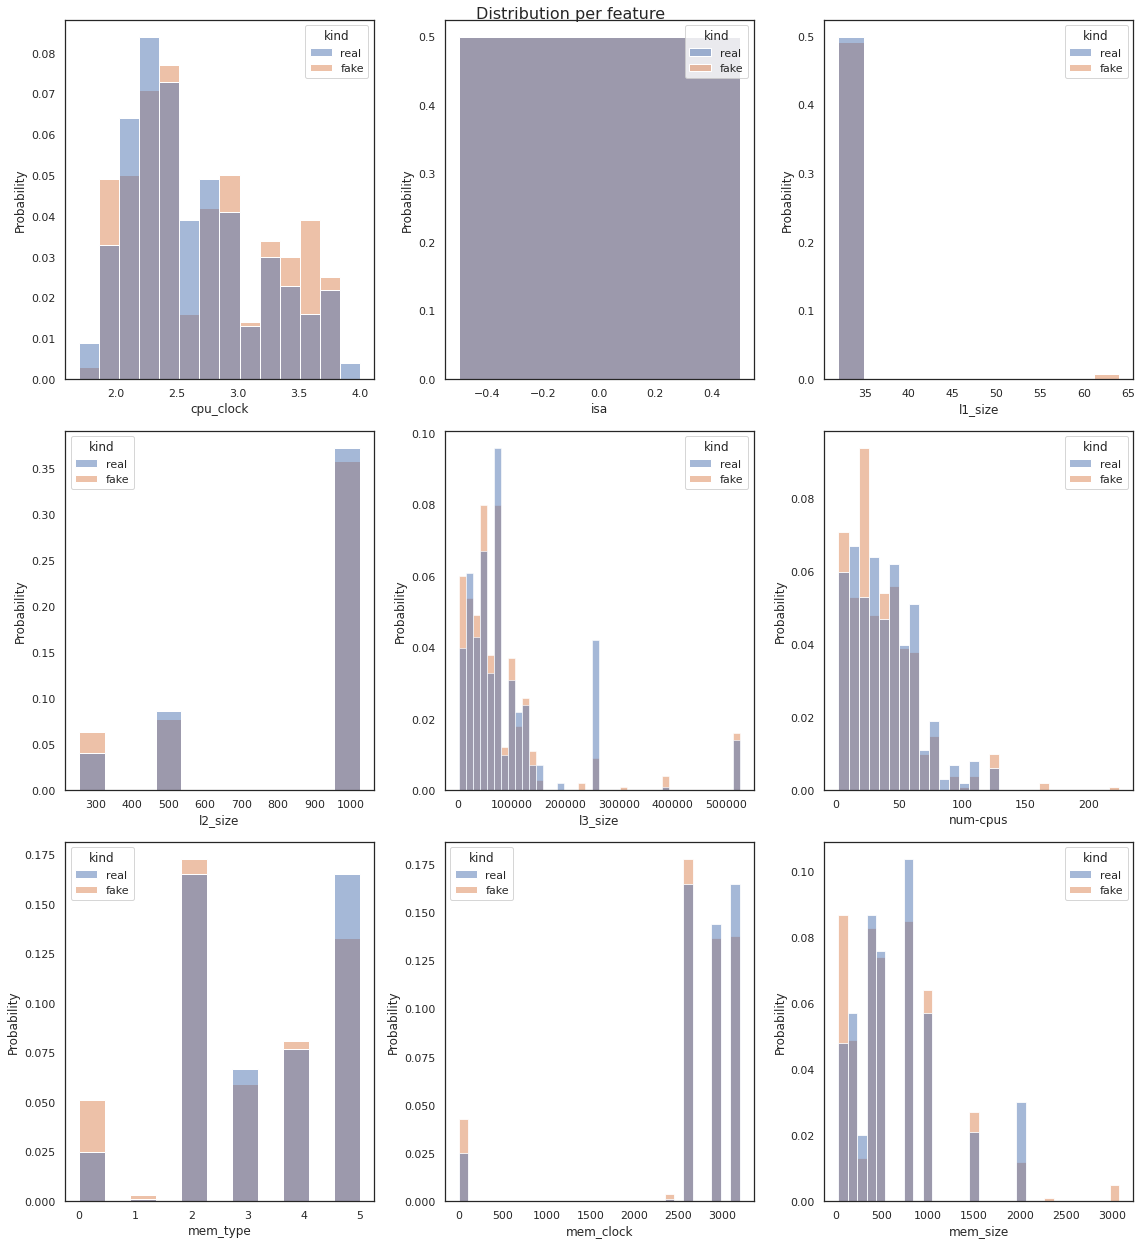

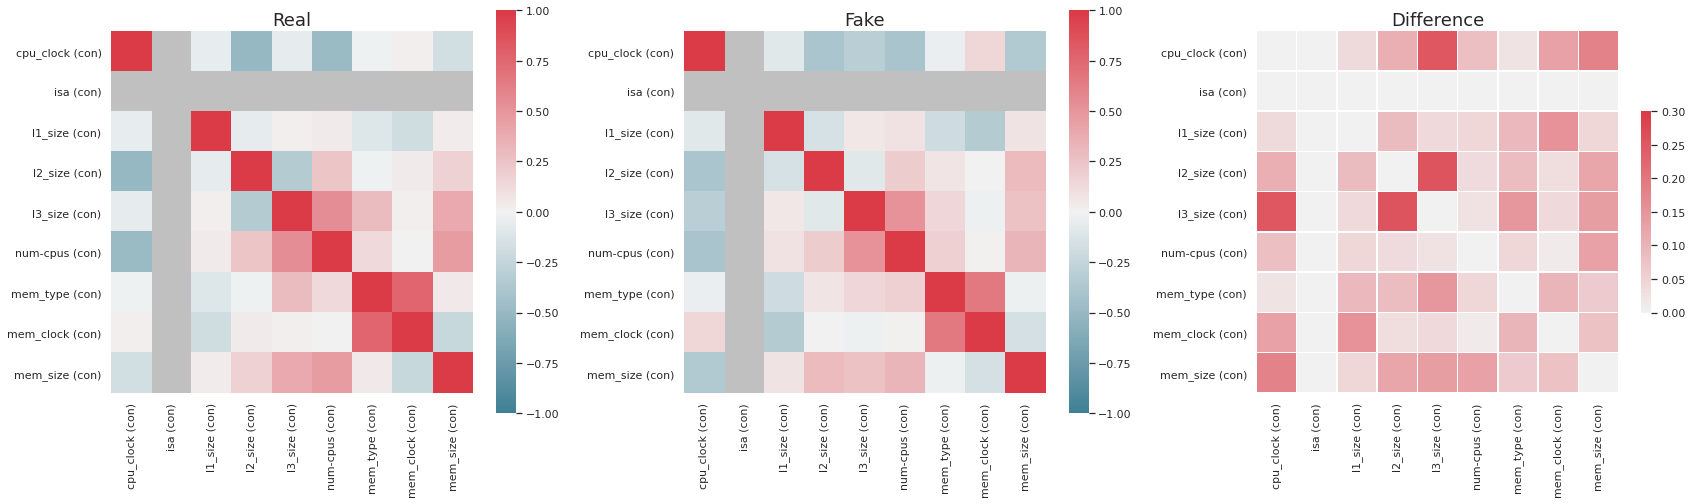

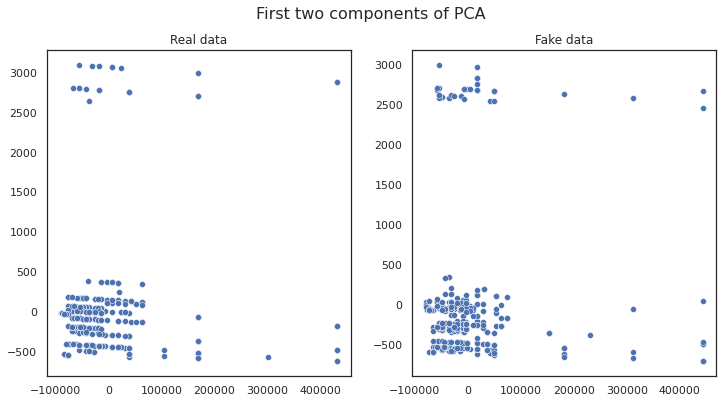

In [ ]:
from table_evaluator import load_data, TableEvaluator

print(len(real_data), len(new_sample))
print(real_data.columns, new_sample.columns)
table_evaluator_new =  TableEvaluator(real_data, new_sample)
table_evaluator_new.visual_evaluation()